> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [140]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [192]:
#In this project, we will investigate the No-show appointments dataset. This dataset collects information from 100k
#medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [193]:
#Convert PatientID from string to integer
df['PatientId']=df['PatientId'].astype(int)

In [194]:
#Convert ScheduleDay from String to Datetime
df['AppointmentDay'] = df['AppointmentDay'].str[:10]
df['ScheduledDay'] = df['ScheduledDay'].str[:10]
import datetime as datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [195]:
#Create new column for "date of week" that the patient showed up for appointment:
df['Day_of_Week'] = pd.to_datetime(df['AppointmentDay']).dt.weekday_name

#Calculate number of days from ScheduledDay to AppointmentDay:
df['Days']= df['AppointmentDay'] - df['ScheduledDay']

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_of_Week,Days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0 days


In [196]:
#Compute descriptive analysis of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10 days 04:24:31.828602
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15 days 06:07:11.673762
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179 days 00:00:00


In [ ]:
#From the descriptive analysis, we found that there are values of negative number of days, which we will omit from the dataset.
#Also, there are negative age (-1 year old), which might be a typo so we will omit that row from the dataset


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [197]:
#Convert Days from date to string:
df.dtypes

PatientId                   int64
AppointmentID               int64
Gender                     object
ScheduledDay       datetime64[ns]
AppointmentDay     datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hipertension                int64
Diabetes                    int64
Alcoholism                  int64
Handcap                     int64
SMS_received                int64
No-show                    object
Day_of_Week                object
Days              timedelta64[ns]
dtype: object

In [198]:
##Check if there is any day <0 then remove them from the data set
df[df['Days'] < '0 days']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_of_Week,Days
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday,-1 days
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday,-1 days
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday,-1 days
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,-6 days
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday,-1 days


In [199]:
#Remove the number of days <0 rows from the dataset
df = df[df['Days'] >= '0 days']

In [200]:
#Check if Age <0
df[df['Age'] <0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_of_Week,Days
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,Monday,0 days


In [201]:
#Remove the appointmentID 5775010 from the dataset, which has age =-1
df = df[df['AppointmentID']!=5775010]
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,10 days 04:25:27.412889
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15 days 06:07:25.262183
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179 days 00:00:00


In [202]:
#Extract int from strings in Days Column
df['Days']=df['Days'].astype(str)
df['Days']=df['Days'].str.extract('(\d+)').astype(int)

In [203]:
#Check the descriptive analysis of the dataset to see whether there is any negative value. 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,10.184345
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15.255153
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [204]:
#Check if there is any missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
Day_of_Week       0
Days              0
dtype: int64

In [205]:
# Check duplicate data
df.duplicated().sum()

0

In [206]:
#Check if there is any duplicated Appointment ID
df['AppointmentID'].duplicated().sum()

0

In [207]:
#Unique values for each column
df.nunique()

PatientId          62298
AppointmentID     110521
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
Day_of_Week            6
Days                 129
dtype: int64

In [209]:
#Create Age Group (under 17 years old, from 17 to 24, from 25 to 44, from 45 to 64, and over 65)
bin_edges = [0,17,24,44,64,115]
bin_names = ['under_17','17_to_24','25_to_44','45_to_64','65_and_over']
df['age_group'] = pd.cut(df['Age'],bin_edges,labels=bin_names)

In [210]:
#Create Waiting Period (0-30 days, 30-60 days, 60-90 days, and over 90 days)
day_edges = [-1,30,60,90,179]
day_names = ['0_to_30days','30_to_60days','60_to_90days','over_90days']
df['Waiting_Period'] = pd.cut(df['Days'],day_edges,labels=day_names)

In [211]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_of_Week,Days,age_group,Waiting_Period
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,0,45_to_64,0_to_30days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,0,45_to_64,0_to_30days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,0,45_to_64,0_to_30days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0,under_17,0_to_30days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0,45_to_64,0_to_30days


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

**What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

**First question: Percentage of No-shows appointment?

In [212]:
df.groupby('No-show').count().apply(lambda x: x/x.sum()).reset_index()

##There are 20% of no-show appointments with code "Yes", which mean 20% of patients doesnot show up for their appointments

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Day_of_Week,Days,age_group,Waiting_Period
0,No,0.798102,0.798102,0.798102,0.798102,0.798102,0.798102,0.798102,0.798102,0.798102,0.798102,0.798102,0.798102,0.798102,0.798102,0.798102,0.797396,0.798102
1,Yes,0.201898,0.201898,0.201898,0.201898,0.201898,0.201898,0.201898,0.201898,0.201898,0.201898,0.201898,0.201898,0.201898,0.201898,0.201898,0.202604,0.201898


In [156]:
## Does the gender affect No-show?
pd.crosstab(df['No-show'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)

Gender,F,M
No-show,,
No,0.648985,0.351015
Yes,0.653894,0.346106


Text(0,0.5,'No-show(%)')

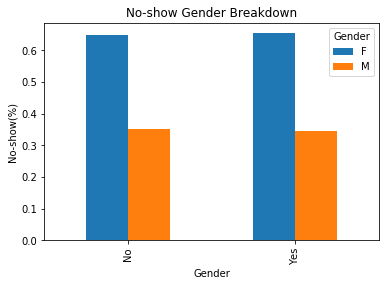

In [107]:
#Conclusion:Male has a slightly higher percentage of absence for appointments. 

#Plot the graph between Gender and No-show
data = pd.crosstab(df['No-show'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)
data.plot(kind="bar", stacked=False)
plt.title("No-show Gender Breakdown")
plt.xlabel("Gender")
plt.ylabel("No-show(%)")

In [108]:
#Does Handcap affect No-show?
pd.crosstab(df['No-show'],df['Handcap']).apply(lambda r: r/r.sum(), axis=1)

Handcap,0,1,2,3,4
No-show,,,,,
No,0.979208,0.019001,0.001655,0.000113,0.000023
Yes,0.981850,0.016313,0.001658,0.000134,0.000045


Text(0,0.5,'No-show(%)')

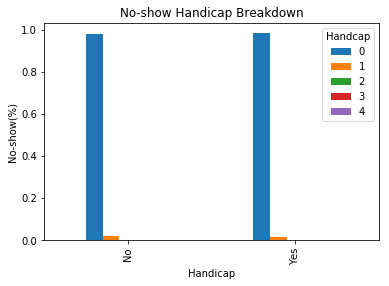

In [109]:
# Conclusion: Handcap 1 has a higher percentage of absence for appointments
data = pd.crosstab(df['No-show'],df['Handcap']).apply(lambda r: r/r.sum(), axis=1)
data.plot(kind="bar", stacked=False)
plt.title("No-show Handicap Breakdown")
plt.xlabel("Handicap")
plt.ylabel("No-show(%)")

In [110]:
#Does SMS_received affect No-show?
pd.crosstab(df['No-show'],df['SMS_received']).apply(lambda r: r/r.sum(), axis=1)

SMS_received,0,1
No-show,,
No,0.708663,0.291337
Yes,0.561531,0.438469


Text(0,0.5,'No-show(%)')

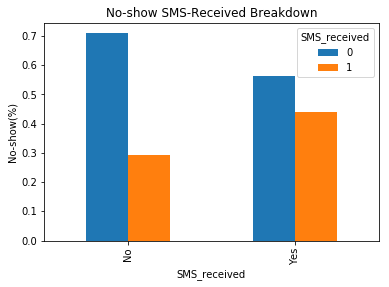

In [111]:
# Conclusion: Receiving a SMS reminder results in higher percentage of  absence for appointments.

data = pd.crosstab(df['No-show'],df['SMS_received']).apply(lambda r: r/r.sum(), axis=1)
data.plot(kind="bar", stacked=False)
plt.title("No-show SMS-Received Breakdown")
plt.xlabel("SMS_received")
plt.ylabel("No-show(%)")

In [44]:
## Does age_group affect No-show?
pd.crosstab(df['No-show'],df['age_group']).apply(lambda r: r/r.sum(), axis=1)

age_group,under_17,17_to_24,25_to_44,45_to_64,65_and_over
No-show,,,,,
No,0.216653,0.086968,0.262628,0.291102,0.142649
Yes,0.247151,0.113818,0.298039,0.238016,0.102976


Text(0,0.5,'No-show(%)')

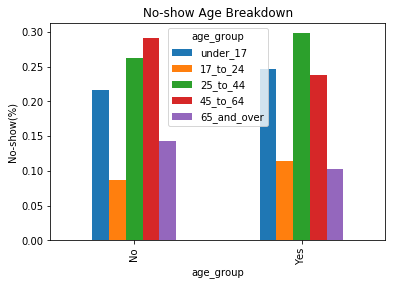

In [45]:
#Patients from 25 to 44 year old have higher percentage of not showing up for appointments. 
data = pd.crosstab(df['No-show'],df['age_group']).apply(lambda r: r/r.sum(), axis=1)
data.plot(kind="bar", stacked=False)
plt.title("No-show Age Breakdown")
plt.xlabel("age_group")
plt.ylabel("No-show(%)")

In [46]:
##Does Waiting Period affect No-Show?
pd.crosstab(df['No-show'],df['Waiting_Period']).apply(lambda r: r/r.sum(), axis=1)

Waiting_Period,0_to_30days,30_to_60days,60_to_90days,over_90days
No-show,,,,
No,0.921174,0.061832,0.015169,0.001825
Yes,0.846509,0.126781,0.024200,0.002510


Text(0,0.5,'No-show(%)')

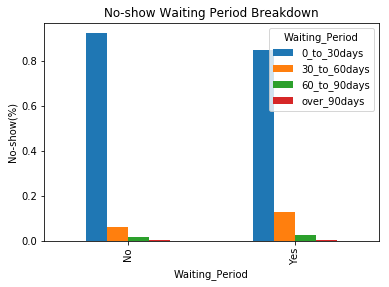

In [47]:
#Conclusion: Waiting period from 31 to 60 days results in higher percentage of absence for appointments. 

data = pd.crosstab(df['No-show'],df['Waiting_Period']).apply(lambda r: r/r.sum(), axis=1)
data.plot(kind="bar", stacked=False)
plt.title("No-show Waiting Period Breakdown")
plt.xlabel("Waiting_Period")
plt.ylabel("No-show(%)")

In [48]:
## Does Scholarship affect No-show?
pd.crosstab(df['No-show'],df['Scholarship']).apply(lambda r: r/r.sum(), axis=1)

Scholarship,0,1
No-show,,
No,0.906096,0.093904
Yes,0.884467,0.115533


Text(0,0.5,'No-show(%)')

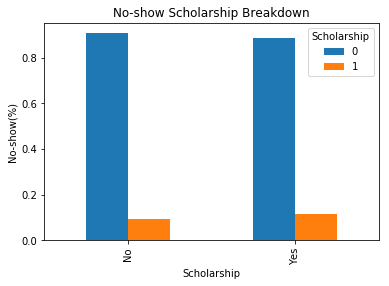

In [49]:
#Conclusion: Receiving a scholarship does not affect much the absence for appointments.
data = pd.crosstab(df['No-show'],df['Scholarship']).apply(lambda r: r/r.sum(), axis=1)
data.plot(kind="bar", stacked=False)
plt.title("No-show Scholarship Breakdown")
plt.xlabel("Scholarship")
plt.ylabel("No-show(%)")

In [50]:
## Does Alcoholism affect No-show?
pd.crosstab(df['No-show'],df['Alcoholism']).apply(lambda r: r/r.sum(), axis=1)

Alcoholism,0,1
No-show,,
No,0.969583,0.030417
Yes,0.969660,0.030340


Text(0,0.5,'No-show(%)')

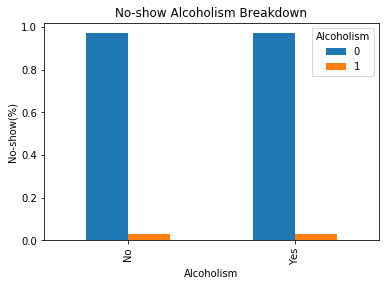

In [51]:
#Conclusion: Alcoholsim does not affect the decision to show up for the appointments
data = pd.crosstab(df['No-show'],df['Alcoholism']).apply(lambda r: r/r.sum(), axis=1)
data.plot(kind="bar", stacked=False)
plt.title("No-show Alcoholism Breakdown")
plt.xlabel("Alcoholism")
plt.ylabel("No-show(%)")

In [112]:
# Does "Day of the Week" affect No-show appointment?
pd.crosstab(df['No-show'],df['Day_of_Week']).apply(lambda r: r/r.sum(), axis=1)

Day_of_Week,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
No-show,,,,,,
No,0.169850,0.204338,0.000340,0.157686,0.232272,0.235514
Yes,0.180918,0.210137,0.000403,0.149547,0.230797,0.228198


Text(0,0.5,'No-show(%)')

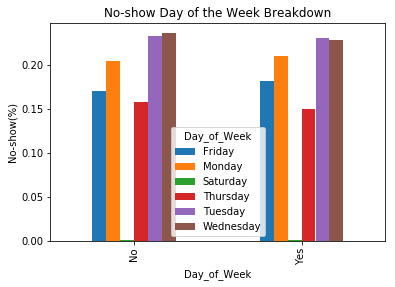

In [113]:
#Conclusion:Patients are more likely to be absent for appointments on Monday and Friday than the other days of the week. 
data = pd.crosstab(df['No-show'],df['Day_of_Week']).apply(lambda r: r/r.sum(), axis=1)
data.plot(kind="bar", stacked=False)
plt.title("No-show Day of the Week Breakdown")
plt.xlabel("Day_of_Week")
plt.ylabel("No-show(%)")

### CHECK THE CORRELATION

In [158]:
df1 = df
df1.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

In [165]:
#Create a new column for Female and a new column for Showing, both of which take binary values. 
df1['Female'] = df1['Gender'].apply(lambda x:0 if x.strip()=='M' else 1)
df1['No-Showing']= df1['No-show']
df1['No-Showing'] = df1['No-Showing'].apply(lambda x:0 if x.strip()=='No' else 1)
df1.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_of_Week,Days,age_group,Waiting_Period,No-Showing,Female
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,0,45_to_64,0_to_30days,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,0,45_to_64,0_to_30days,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,0,45_to_64,0_to_30days,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0,under_17,0_to_30days,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0,45_to_64,0_to_30days,0,1


In [166]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

#The correlation confirms our above analysis. 

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days,No-Showing,Female
Age,1,-0.0924685,0.504599,0.292398,0.0958114,0.0781009,0.0126289,0.0348128,-0.0603196,0.106439
Scholarship,-0.0924685,1,-0.0197379,-0.0248986,0.0350194,-0.00855463,0.00118171,-0.0304352,0.0291659,0.114297
Hipertension,0.504599,-0.0197379,1,0.433082,0.0879667,0.0801623,-0.00628549,-0.0172362,-0.0356623,0.0557212
Diabetes,0.292398,-0.0248986,0.433082,1,0.0184709,0.0575783,-0.0145606,-0.0272003,-0.0151576,0.0325554
Alcoholism,0.0958114,0.0350194,0.0879667,0.0184709,1,0.00466772,-0.0261544,-0.038527,-0.000180941,-0.10617
Handcap,0.0781009,-0.00855463,0.0801623,0.0575783,0.00466772,1,-0.0240973,-0.0197737,-0.0062898,-0.022787
SMS_received,0.0126289,0.00118171,-0.00628549,-0.0145606,-0.0261544,-0.0240973,1,0.398128,0.126502,0.0463008
Days,0.0348128,-0.0304352,-0.0172362,-0.0272003,-0.038527,-0.0197737,0.398128,1,0.18632,0.0284105
No-Showing,-0.0603196,0.0291659,-0.0356623,-0.0151576,-0.000180941,-0.0062898,0.126502,0.18632,1,0.00413188
Female,0.106439,0.114297,0.0557212,0.0325554,-0.10617,-0.022787,0.0463008,0.0284105,0.00413188,1


CONCLUSIONS

*1. Male has a slightly higher percentage of being absent for the appointments than Female.*

*2. Handcap 1 has a higher percentage of absence for appointments.*

*3. Receiving a SMS reminder results in higher percentage of  absence for appointments, which suggests that reminder systems are not effective at improving appointment attendance.*

*4. Patients from 25 to 44 year old have higher percentage of not showing up for appointments.*

*5. Waiting period from 31 to 60 days results in higher percentage of absence for appointments.*

*6. Alcoholsim and Scholarship do not affect the decision to show up for the appointments.*

*7. Patients are more likely to be absent for appointments on Monday and Friday than the other days of the week.*


LIMITATION
All results are limited and there is no advanced statistics performed such as multi-linear regression. Also we omit the missing data from the dataset, so these missing values might limit its usability. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])